# Estimating PMFs and PDFs with histograms

***In a nutshell:***

Histograms are constructed by counting the numbers of samples in two or more categories. The categories may arise in two ways:
* They may correspond to *intrinsically discrete categories* (e.g., tails and heads for coin flips, the numbers 1 through 6 for outcomes of rolls of a die, or apple/orange/banana/pomegranate/mango for 5 fruits).
* They may arise from *binning a continuous quantity*, which creates categories corresponding to a set of intervals for the quantity (usually contiguous intervals).

Histograms are used in three main ways:
* A *raw* histogram shows the **counts** in the categories. The ordinate is an integer number of counts in a category.
* A *normalized* histogram or *frequency* histogram uses the counts to **estimate a PMF** (probabilities for samples falling in each categorie). The histogram ordinate is a *probability* (a real number in $[0,1]$). "Frequency histogram" is probably the better term, at least in a binned continuous data setting, since the meaning of "normalized" is ambiguous in that setting (it could mean normalized as a sum over the bins, or as an integral giving the area under the histogram curve).
* A *density* histogram uses the counts to **estimate a PDF**. It applies only to *binned* continuous data. It typically estimates the PDF at the center of each bin. The density histogram ordinate is a probability *density* (a real number $> 0$, with units of $1/[x]$, where $[x]$ denotes the units of $x$, the binned quantity). It is normalized if one integrates to find the area under the histogram curve.

## Imports, setup

In [1]:
import numpy as np
from numpy import *
import scipy
import matplotlib as mpl
from matplotlib.pyplot import *
from scipy import stats

In [2]:
# mpl parameter settings for more readable plots:
from matplotlib import rc

rcParams['figure.figsize'] = (8,6)
rc('figure.subplot', bottom=.125, top=.95, right=.95)  # left=0.125
rc('axes', labelsize=18)
rc('xtick.major', pad=8)
rc('xtick', labelsize=14)
rc('ytick.major', pad=8)
rc('ytick', labelsize=14)

Make sure Jupyter doesn't put largish plots in annoying scrolling windows.

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Samples from a narrow normal distribution

We'll demonstrate histogramming using samples from a *narrow* normal PDF, to make the point that a PDF can have values > 1 (it's a *density*, not a probability!).

In [4]:
# A frozen narrow normal:
mu, sig = 3., .1
narrow_norm = stats.norm(loc=mu, scale=sig)

nsamp = 1000
samples = narrow_norm.rvs(nsamp)

## A raw histogram (counts)

By default, `matplotlib`'s `pyplot.hist` function produces **raw histograms** (counts in bins).

Although we often use `hist` just to plot a histogram, note that `hist` has **return values**, which get shown in the notebook if a "bare" call of `hist` is the last expression in a cell, as here:

(array([  2.,   5.,   5.,  18.,  36.,  29.,  62.,  71., 103., 122., 112.,
        104.,  86.,  90.,  54.,  45.,  22.,  19.,   5.,   4.,   3.]),
 array([2.7       , 2.72857143, 2.75714286, 2.78571429, 2.81428571,
        2.84285714, 2.87142857, 2.9       , 2.92857143, 2.95714286,
        2.98571429, 3.01428571, 3.04285714, 3.07142857, 3.1       ,
        3.12857143, 3.15714286, 3.18571429, 3.21428571, 3.24285714,
        3.27142857, 3.3       ]),
 <BarContainer object of 21 artists>)

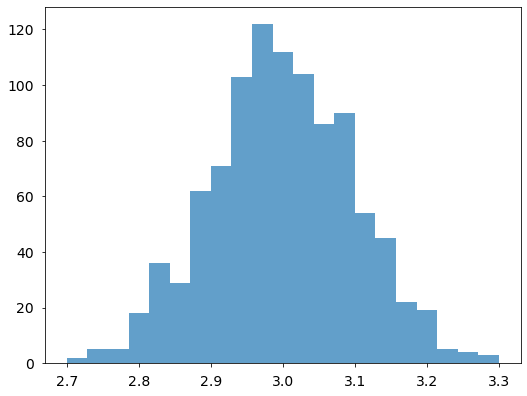

In [5]:
# Use a range of +- 3*sig.
l_u = mu-3*sig, mu+3*sig
nbins = 21
# 
hist(samples, bins=nbins, range=l_u, alpha=.7)

The `hist` output evidently comprises three quantities in a tuple (it can be more complicated if `hist` is used to plot multiple histograms at once). The values are:
* the $y$ values comprising the histogram ordinates (in an array of $K$ values for $K$ bins);
* the $x$ values for the boundaries (an array of $K+1$ values);
* an object containing the rectangular patches comprising the plot (which can be modified to change the plot style).

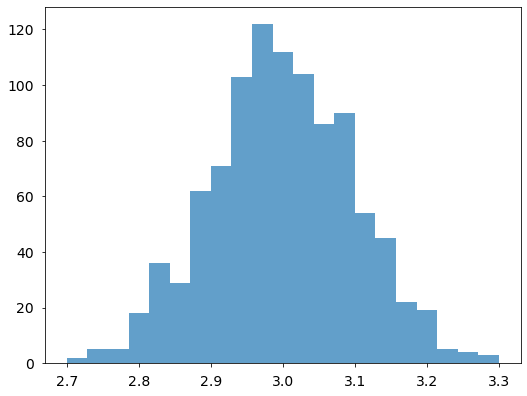

In [6]:
# Capture the hist output:
counts, bins, patches = hist(samples, bins=nbins, range=l_u, alpha=.7)

In [7]:
# This is a raw binned histogram; n has the counts in
# the bins.  They sum to nearly equal nsamp (some
# samples fell outside of the binned range).
counts.sum()

997.0

Let's plot the raw histogram one last time, but now labeled so the reader knows its a raw histogram.  **Always label your plot axes!**

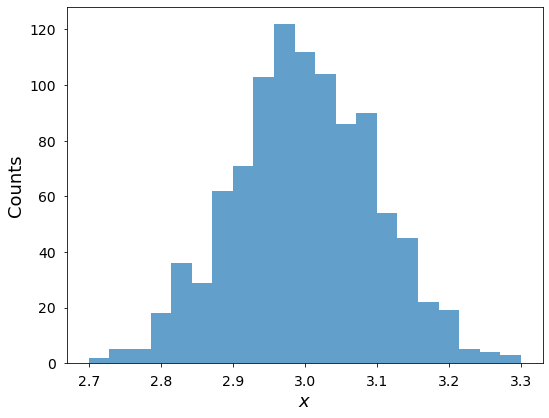

In [8]:
counts, bins, patches = hist(samples, bins=nbins, range=l_u, alpha=.7)
xlabel('$x$')
ylabel('Counts');  # semicolon suppresses the text return value

## A normalized histogram

A *normalized* version of this histogram would show estimated *probabilities* for a sample to fall into a bin, typically simply using the *relative frequency* (counts over total counts) to estimate the probability for a sample to fall into each bin.

The `hist` function doesn't have an option to produce normalized histograms. They're very useful for intrinsically categorical data (coin flips, die rolls, fruit counts), but `hist` isn't designed for handling such data. They're not so useful for binned continous data, which is what `hist` was designed for.

We'll look at normalized histograms for binned data anyway, as a stepping stone to density histograms.

The `hist` function has an optional `weights` parameter that we can use to trick it into making a normalized histogram. When provided, `weights` should be an array of floats to be used as the count for each sample. Not providing `weights` has the same effect as setting `weights` equal to an array of 1s for each sample.

To get a frequency histogram, we can simply give each sample a weight of `1/nsamp`. This will make the ordinate ($y$ value) equal to the fraction of the whole sample that fell into a bin. If some samples fall out of the binned range, the sum of the plotted frequencies will be less than 1.  If you want the *plotted* histogram to be normalized, the weight should instead be the inverse of the number of samples within the range. We'll normalize over the whole sample here, not just the plotted range.

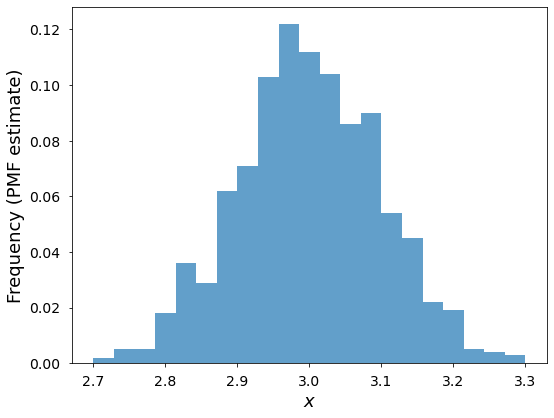

In [9]:
wvals = ones_like(samples)/nsamp
yvals, bins, patches = hist(samples, bins=nbins, weights=wvals, range=l_u, alpha=.7)
xlabel('$x$')
ylabel('Frequency (PMF estimate)');  # semicolon suppresses the text return value

The `y` values do indeed look like a PMF (probabilities for each bin)—they sum to nearly 1 (a bit less because of the outlying samples).

In [10]:
yvals.sum()

0.9970000000000007

## Density histograms

To use a histogram to estimate a probability *density*, we simply divide the frequency (a *probability* estimate) by the bin width (since a density is a *probability per unit interval*).

The `hist` function has an optional `density` argument that, when set to `True`, does this for us:

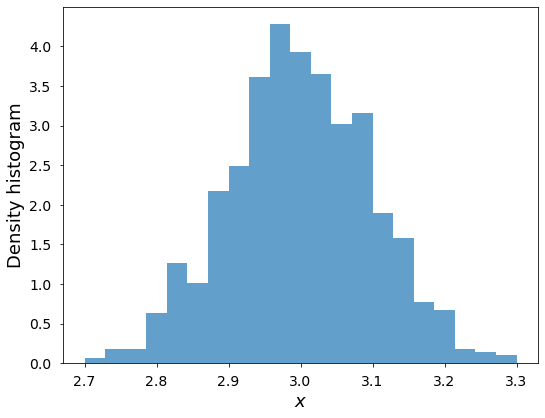

In [11]:
yvals, bins, patches = hist(samples, bins=nbins, density=True, range=l_u, alpha=.7)
xlabel('$x$')
ylabel('Density histogram');  # semicolon suppresses the text return value

Here are the ordinates:

In [12]:
print(yvals)

[0.07021063 0.17552658 0.17552658 0.63189569 1.26379137 1.01805416
 2.17652959 2.49247743 3.61584754 4.28284855 3.93179539 3.65095286
 3.01905717 3.15947844 1.89568706 1.57973922 0.77231695 0.667001
 0.17552658 0.14042126 0.10531595]


Note that they're floats (not integers), and that they are obviously not probabilities, since they can be greater than 1.  (We used a narrow PDF to make that happen; make sure you understand why it happens; you should be able to roughly estimate the PDF height without seeing the plot, just from knowing the value of `sig`.)

Let's see if those values look like PDF values by finding the sum of the areas of the histogram rectangles.

In [13]:
dx = bins[1] - bins[0]  # bin width
areas = dx*yvals
areas.sum()

0.9999999999999972

Looks like a PDF!

Note how close to 1 that normalization value is—it's equal to 1 up to roundoff error. That means a density histogram produced by `hist` is **always normalized over the plotted range**. That is, to get the frequency in each bin, it divides the counts by the sum of the counts in all of the plotted bins, not by the total number of samples (or the total of the weights). That's a bit unfortunate, if you want to be "honest" about accounting for out-of-range points. Unfortunately, `hist` doesn't provide any options to control this behavior.

A density histogram is a *piecewise constant* PDF estimate. We can get something that looks a bit smoother by considering the density estimates to be PDF estimates at the bin centers, and plotting the resulting curve (here shown on top of the density histogram).

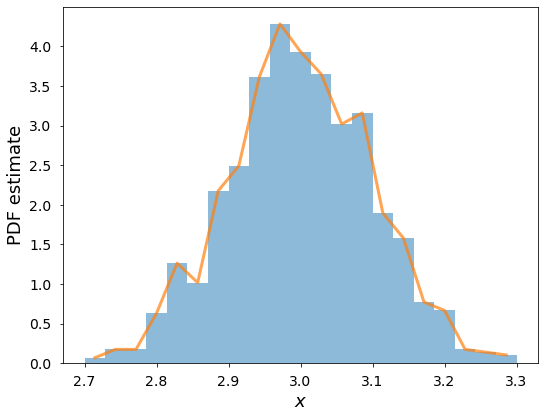

In [14]:
yvals, bins, patches = hist(samples, bins=nbins, density=True, range=l_u, alpha=.5)
centers = 0.5*(bins[:-1] + bins[1:])  # average of left, right sides
plot(centers, yvals, ls='-', lw=3, alpha=.7)
xlabel('$x$')
ylabel('PDF estimate');

That looks pretty ugly, both because of the coarse binning, and because of the uncertainty of the estimates, due to the modest number of samples.  With at most ~100 counts per bin, the RMS error in the frequency estimates in the most populated bins is $\sim \sqrt{100}/100 = 0.1$, or 10% of the $y$ value; once adjusted to be a PDF estimate (by dividing by the bin width), the error is the same 10%.  That's a fair amount of uncertainty—and it's larger for the less-populated bins. We should communicate that somehow.

A good way to communicate the uncertainty is by reporting the posterior standard deviation for the PDF estimate in each bin, e.g., with error bars at the bin centers.

Thinking back to Lec05 (Bernoulli/binomial inference), we know how to get the posterior standard deviation for the estimate of the *probability*, $\alpha$, for a discrete outcome (heads vs. tail).  We can apply that knowledge here, bin by bin, considering $\alpha_k$ to be the probability for a sample to fall into bin $k$ (so that $(1-\alpha_k)$ is the probability for a sample to fall outside that bin).

Translating to our current cetting, we showed in Lec05 that the posterior PDF for $\alpha_k$ is a beta distribution, with a mode at $\hat\alpha_k = n_k/N$ (for $n_k$ counts in the bin, with $N$ total samples).  The posterior standard deviation for $\alpha_k$ is approximately $\sqrt{n_k}/N$ (a good approximation when $n_k$ is large and $N\gg n_k$). The actual formula for the standard deviation is implemented in this function (which appeared in the `two_state_markov.py` module):

In [15]:
def sig_alpha(n, ntot):
    """
    Posterior standard deviation of the beta distribution posterior PDF
    for  a binomial distribution's parameter, inferred from n successes 
    out of ntot trials, using a flat prior.

    This uses the formula for the standard deviation of a beta dist'n.
    """
    return sqrt((n+1.)*(ntot-n+1.) / (ntot+2.)**2 / (ntot+3.))

To use this, we need to know the counts, but `hist` returns the PDF estimate based on the counts, not the counts themselves.

It's not hard to reverse the calculation; just make sure you know how many samples are included in the plotted range.

In [16]:
l, u = l_u
# This gives an array of True/False values indicating
# if a sample is in in/out of the interval.
inside = (samples >= l) & (samples <= u)
n_in = inside.sum()  # True is treated as 1 in boolean sums
counts = yvals*dx*n_in
counts.sum()

996.9999999999972

Alternatively, it's worth noting that NumPy has a `histogram` function that produces the same results as the first two return values of `hist` (except that it gives integer values for raw histograms):

In [17]:
counts2, bins = histogram(samples, bins=nbins, range=l_u)
(counts2-counts).max()  # should be ~ roundoff error

1.4068746168049984e-12

In [18]:
counts

array([  2.,   5.,   5.,  18.,  36.,  29.,  62.,  71., 103., 122., 112.,
       104.,  86.,  90.,  54.,  45.,  22.,  19.,   5.,   4.,   3.])

In [19]:
counts2

array([  2,   5,   5,  18,  36,  29,  62,  71, 103, 122, 112, 104,  86,
        90,  54,  45,  22,  19,   5,   4,   3])

In [20]:
# Use counts to get uncertainties in the bin probabilities:
sig_alphas = sig_alpha(counts, nsamp)  # could use n_in here

# Those are uncertainties in the per-bin probabilities;
# divide by bin width to get uncertainties in the PDF estimates:
sig_pdf = sig_alphas/dx

We can use those standard deviations as error bars to communicate the uncertainties in the density histogram's PDF estimates.  This is especially useful to help us interpret structure in the histogram—bumpiness on the scale of 1 to 3 times the size of an error bar is unlikely to be real.

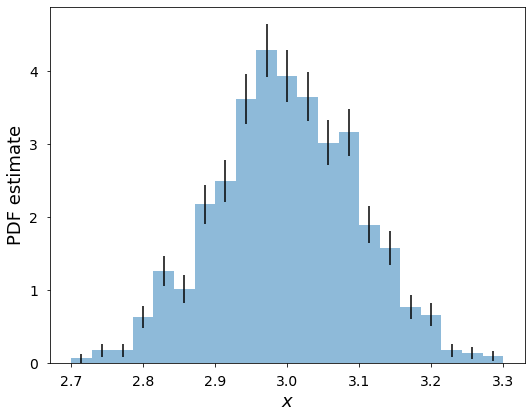

In [21]:
yvals, bins, patches = hist(samples, bins=nbins, density=True, range=l_u, alpha=.5)
centers = 0.5*(bins[:-1] + bins[1:])  # average of left, right sides
errorbar(centers, yvals, yerr=sig_pdf, c='k', ls='')
xlabel('$x$')
ylabel('PDF estimate');

Let's plot one last density histogram, with lots more samples, and showing the true PDF to see how close the estimates are. Note that the true PDF curve is normalized over the whole real line, so if the `hist` histogram omits a significant number of outlying samples, it will be somewhat higher than the true PDF.

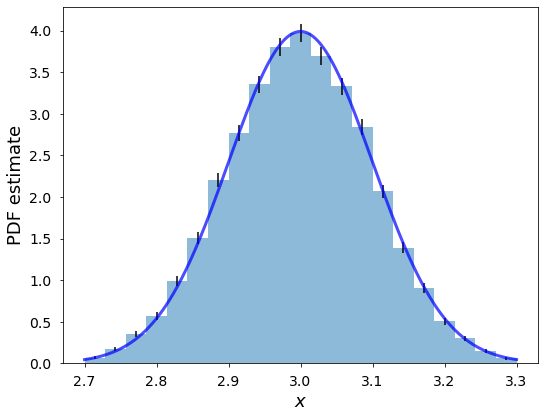

In [22]:
# Generate samples
nsamp = 10000
samples = narrow_norm.rvs(nsamp)

# Plot a density histogram.
yvals, bins, patches = hist(samples, bins=nbins, density=True, range=l_u, alpha=.5)

# Recover the counts in bins.
inside = (samples >= l) & (samples <= u)
n_in = inside.sum()  # True is treated as 1 in boolean sums
counts = yvals*dx*n_in

# Use counts to get PDF estimate uncertainties.
sig_alphas = sig_alpha(counts, nsamp)  # could use n_in here
sig_pdf = sig_alphas/dx

# Errorbars:
centers = 0.5*(bins[:-1] + bins[1:])  # average of left, right sides
errorbar(centers, yvals, yerr=sig_pdf, c='k', ls='')

# True PDF:
xvals = linspace(l, u, 500)
pdf = narrow_norm.pdf(xvals)
plot(xvals, pdf, 'b-', lw=3, alpha=.7)

# Don't forget this part!
xlabel('$x$')
ylabel('PDF estimate');